![title](img/Head.jpg)

In [1]:
# Import basic libraries:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Set plotting options:
%matplotlib inline
plt.style.use(['seaborn-whitegrid', 'tableau-colorblind10'])

# Set pandas options:
pd.set_option('display.max_colwidth', 100)

In [2]:
# Import libraries:
from tabulate import tabulate


# Define function to print large lists in a tabular form:
def print_huge_list(lst, cols=5, strip=False, style='psql'):
    '''
    Print huge list in table format with pointed number of columns.
    '''
    if strip:
        lst = [entry.strip() for entry in lst]
    print(
        tabulate(
            [lst[i:i+cols] for i in np.arange(len(lst) // cols + 1)*cols],
            tablefmt=style
        )
    )

# <center>Kaggle Global Terrorism Database</center>
### <center>Data import and cleaning</center>
First, we need to load Global Terrorism database from Kallge: https://www.kaggle.com/START-UMD/gtd#globalterrorismdb_0718dist.csv

In [3]:
# Load the dataset:
df_from_kaggle = pd.read_csv('data\globalterrorismdb_0718dist.csv', encoding="ISO-8859-1", low_memory=False)

In [4]:
# Print basic info and first several rows of the dataset:

print('Number of records in the dataset:\t\t{:,}'.format(len(df_from_kaggle)))
print('Number of features in the dataset:\t\t{:,}'.format(len(df_from_kaggle.columns)))
print('Dataset attribute names:')
print_huge_list(lst=df_from_kaggle.columns.tolist(), cols=6)

# Print first 3 records from the dataframe:
df_from_kaggle.describe().transpose()

Number of records in the dataset:		181,691
Number of features in the dataset:		135
Dataset attribute names:
+------------------+------------------+------------------+--------------------+------------------+------------------+
| eventid          | iyear            | imonth           | iday               | approxdate       | extended         |
| resolution       | country          | country_txt      | region             | region_txt       | provstate        |
| city             | latitude         | longitude        | specificity        | vicinity         | location         |
| summary          | crit1            | crit2            | crit3              | doubtterr        | alternative      |
| alternative_txt  | multiple         | success          | suicide            | attacktype1      | attacktype1_txt  |
| attacktype2      | attacktype2_txt  | attacktype3      | attacktype3_txt    | targtype1        | targtype1_txt    |
| targsubtype1     | targsubtype1_txt | corp1            | target1

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
latitude,177135.0,2.349834e+01,1.856924e+01,-5.315461e+01,1.151005e+01,3.146746e+01,3.468509e+01,7.463355e+01
longitude,177134.0,-4.586957e+02,2.047790e+05,-8.618590e+07,4.545640e+00,4.324651e+01,6.871033e+01,1.793667e+02
specificity,181685.0,1.451452e+00,9.954295e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [5]:
# Rename column of interest:
df_from_kaggle = df_from_kaggle.rename(columns=dict(eventid = 'ID', iyear = 'Year', imonth = 'Month', iday = 'Day',
                                                    region_txt = 'Region', country = 'Country_Num', country_txt = 'Country',
                                                    city = 'City', latitude = 'Lat', longitude = 'Long', gname = 'Perpetrator',
                                                    summary = 'Info', nkill = 'Killed', nwound = 'Injured'))

##### Check dataset for records missing crucial data

In [6]:
print('Number of records with missing victims data:\t{:,}'\
      .format(df_from_kaggle[['Killed', 'Injured']].isna().all(axis=1).sum()))
print('Number of records without weapon information:\t{:,}'\
      .format(df_from_kaggle[['weaptype1']].isna().all(axis=1).sum()))

Number of records with missing victims data:	9,750
Number of records without weapon information:	0


Though there are 9,750 records missing data about victims, they still contain valuable information about attacks type and weapon used, so we need to keep them.

##### Check dataset for duplicated records
If we check the Codebook, we can find this notice:

![Image](img/related_note.png)

In the light of this note, we will check the dataset for the duplicated records that are not related ('related' feature is empty). 
We specify parameter 'keep' = 'first', meaning that we mark duplicates as True except for the first occurence.

Total number of duplicated records:		1,978


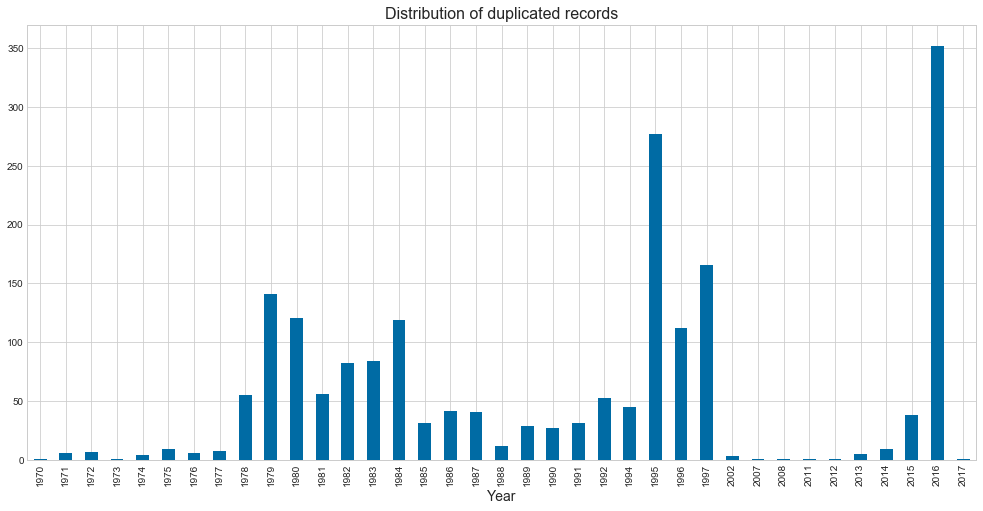

In [7]:
# Create index of duplicated records:
ind_duplicates = df_from_kaggle.related.isna() & df_from_kaggle.drop(columns=['ID']).duplicated(keep='first')

# Print summary:
print('Total number of duplicated records:\t\t{:,}'.format(ind_duplicates.sum()))

# Plot distribution graph:
plt.figure(figsize=(17,8))
pd.pivot_table(data=df_from_kaggle[ind_duplicates],
               index='Country',
               columns='Year',
               values='ID',
               aggfunc=len).sum().plot(kind='bar')
plt.title('Distribution of duplicated records', fontsize=16)
plt.ylim(bottom=0)
plt.xlabel('Year', fontsize=14)
plt.show()

Lets check first few recored for 2013:

In [8]:
# Print first duplicated records:
df_from_kaggle.loc[ind_duplicates & (df_from_kaggle.Year == 2013),
                   ['ID', 'Country','City', 'Killed', 'Injured', 'Info']].head(10)

,ID,Country,City,Killed,Injured,Info
113917,201301240012,Iraq,Unknown,0.0,3.0,"01/24/2013: An explosive device detonated in an unknown location in Diyala governorate, Iraq. Th..."
114023,201301270041,West Bank and Gaza Strip,Jerusalem,0.0,0.0,"01/27/2013: An assailant with a pipe bomb was arrested on the outskirts of Jerusalem, West Bank,..."
114024,201301270042,West Bank and Gaza Strip,Jerusalem,0.0,0.0,"01/27/2013: An assailant with a pipe bomb was arrested on the outskirts of Jerusalem, West Bank,..."
117816,201306040008,Afghanistan,Sangin district,3.0,0.0,"06/04/2013: An explosive device detonated in Sangin district, Helmand province, Afghanistan. Thi..."
120801,201309010012,Iraq,Unknown,0.0,2.0,"09/01/2013: A roadside bomb detonated in Diyala governorate, Iraq. This was one of three uncoord..."


We've checked some records from 2013, and it could be seen, that they are identical, and for each incedent summary mentions an attack in a singular form (meaning, that there is no sign of the series of attacks). Before we make our final decsision, we need to check how these records influence the bigger picture. 
Lets check the distribution of the number of victims in duplicated records.

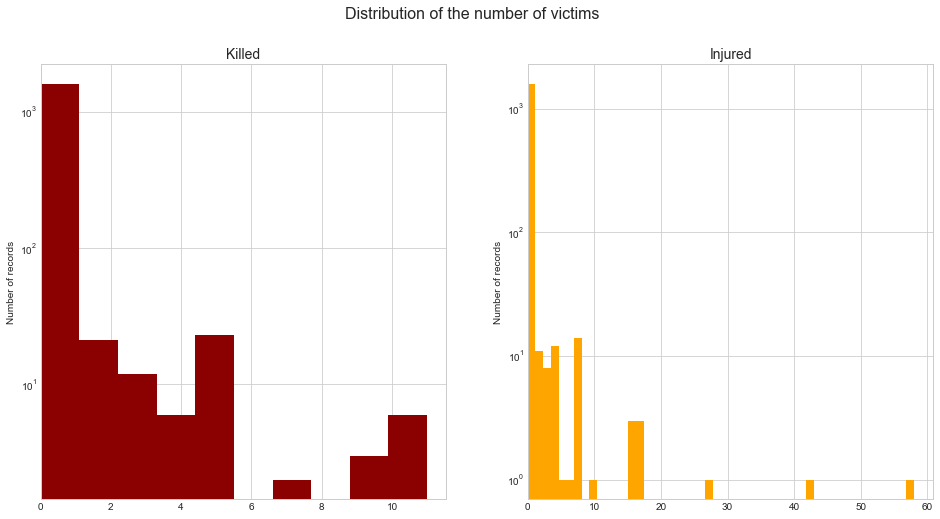

In [9]:
# Create plot with two subplots:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,8), subplot_kw=dict(yscale='log'))

# Add title to the plot:
fig.suptitle('Distribution of the number of victims', fontsize=16)

# Plot left subplot:
ax1.hist(df_from_kaggle.Killed[ind_duplicates].dropna(), bins=10, color='darkred')
ax1.set_title('Killed', fontsize=14)
ax1.set_xlim(left=0)
ax1.set_ylabel('Number of records')

# Plot right subplot:
ax2.hist(df_from_kaggle.Injured[ind_duplicates].dropna(),  bins=50, color='orange')
ax2.set_title('Injured', fontsize=14)
ax2.set_xlim(left=0)
ax2.set_ylabel('Number of records')

# Show plot:
plt.show()

In the majority of the records victims number is low, but all these record include information about weapon type, so it would affect our result. 
We need to drop these records.

In [10]:
# Remove duplicated records:
df_from_kaggle = df_from_kaggle[~ind_duplicates]

# Print the result:
print('Records left after initial duplicates removal:\t{:,}'.format(len(df_from_kaggle)))

Records left after initial duplicates removal:	179,713


##### Check dataset for extreme values
To find outliers we plot the distribution of two most important for us indicators: 'Killed' and 'Injured'

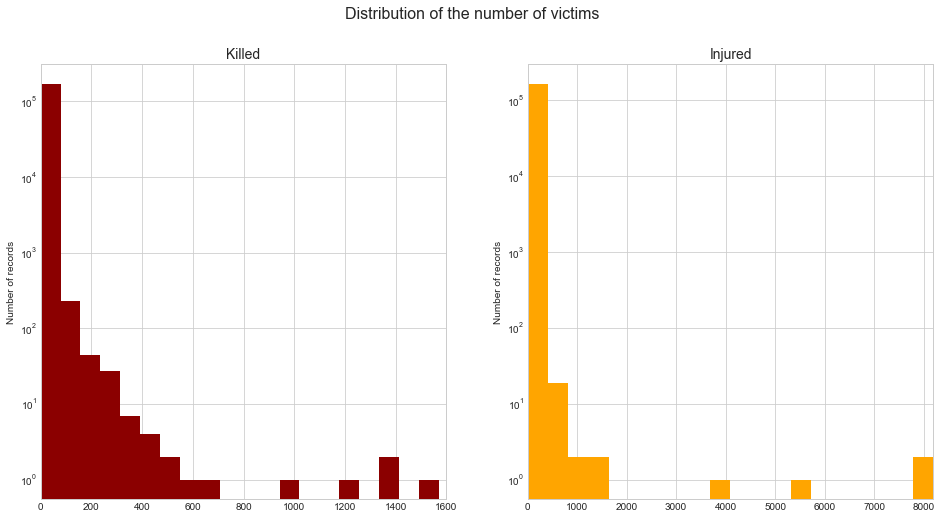

In [11]:
# Create plot with two subplots:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,8), subplot_kw=dict(yscale='log'))

# Add title to the plot:
fig.suptitle('Distribution of the number of victims', fontsize=16)

# Plot left subplot:
ax1.hist(df_from_kaggle.Killed.dropna(), bins=20, color='darkred')
ax1.set_title('Killed', fontsize=14)
ax1.set_xlim(left=0, right=round(df_from_kaggle.Killed.max(),-2))
ax1.set_ylabel('Number of records')

# Plot right subplot:
ax2.hist(df_from_kaggle.Injured.dropna(),  bins=20, color='orange')
ax2.set_title('Injured', fontsize=14)
ax2.set_xlim(left=0, right=round(df_from_kaggle.Injured.max(),-2))
ax2.set_ylabel('Number of records')

# Show plot:
plt.show()

Lets check records where number of killed was greater than 500 or number of injured was greater than 1000

In [12]:
df_from_kaggle.query('Killed >= 500 | Injured >= 1000')[['ID', 'Country', 'City', 'Killed', 'Injured', 'Info']]

,ID,Country,City,Killed,Injured,Info
55934,199404130008,Rwanda,Gikoro,1180.0,0.0,NaN
58841,199503200014,Japan,Tokyo,13.0,5500.0,NaN
61548,199601310002,Sri Lanka,Colombo,90.0,1272.0,NaN
68071,199808070002,Kenya,Nairobi,224.0,4000.0,08/07/1998: Suicide attackers detonated a vehicle bomb outside of the United States Embassy in N...
73126,200109110004,United States,New York City,1384.0,8190.0,09/11/2001: This was one of four related attacks that occurred in the United States that are kno...
73127,200109110005,United States,New York City,1383.0,8191.0,09/11/2001: This was one of four related attacks that occurred in the United States that are kno...
76347,200403210001,Nepal,Dhading district,518.0,216.0,"03/21/2004: Nepalese Communist Party (Maoist) members attacked a small town in Bedi, Nepal. Duri..."
85682,200802010006,Chad,N'Djamena,160.0,1001.0,"2/2/2008: Chadian rebels attacked the capital city of N'Djamena, in N'Djamena region, Chad. The..."
133225,201406100042,Iraq,Badush,670.0,0.0,"06/10/2014: Assailants stormed Badush prison in Badush city, Nineveh governorate, Iraq. The assa..."
133518,201406150063,Iraq,Tikrit,1570.0,NaN,"06/12/2014: Assailants abducted approximately 1686 soldiers from Camp Speicher in Tikrit city, S..."


There are two records about 9/11 attacks that are almost the same, the only difference is in the number of killed and injured in the attack (+1 and -1 for both records). Let us take a closer look.

In [13]:
for attr in df_from_kaggle.loc[73126][df_from_kaggle.loc[73126] != df_from_kaggle.loc[73127]].dropna().index:
    print('{0} :\nRecord #73126:\t{1}\nRecord #73127:\t{2}\n{3}'.format(attr, df_from_kaggle.loc[73126, attr],
                                                                        df_from_kaggle.loc[73127, attr],
                                                                        '-'*120))

ID :
Record #73126:	200109110004
Record #73127:	200109110005
------------------------------------------------------------------------------------------------------------------------
Info :
Record #73126:	09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the first attack, which occurred at 8:46 am local time, American Airlines Flight 11 crashed into the North Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida took control of the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 76 passengers, 11 crew members and five hijackers on the plane, all of whom died upon impact. The North Tower collapsed at 10:28 a.m. local time after the South Tower had collapsed at 9:59 a.m. local time. At least 2,767 people died as a result of the 

As was mentioned earlier in the note from the Codebook, fatalities are divided between these two attacks, so we don't need to worry about these records.

##### Check dataset for wrong geodata
Because we are going to plot our data on the map, we have to check if there are records with unacceptable longitude and latitude values

In [14]:
# Select records with unappropriate geo data and remove it from the dataset:
df_from_kaggle.loc[(df_from_kaggle.Lat < -90) | (df_from_kaggle.Lat > 90) |
                   (df_from_kaggle.Long < -180) | (df_from_kaggle.Long > 180),
                   ['ID', 'Country', 'City', 'Lat', 'Long', 'Killed','Injured']]

,ID,Country,City,Lat,Long,Killed,Injured
17658,198212240004,Nicaragua,Valle El Oregano,12.643985,-86185896.0,5.0,0.0


In [15]:
# The founded records still hold valuable information, so we just need to replace incorrect geo values with NaN:
df_from_kaggle.loc[(df_from_kaggle.Lat < -90) | (df_from_kaggle.Lat > 90) |
                   (df_from_kaggle.Long < -180) | (df_from_kaggle.Long > 180),
                   ['ID', 'Country', 'City', 'Lat', 'Long', 'Killed','Injured']] = None

#####  Check dataset for missting geodata
We would like to map attacks on the world map, so we need to check for missing longitude and latitude data and replace it with the mode for cpecific country.

In [16]:
# Check how many there are records with missing geodata:
print('There are {:,} records with missing geo data'\
      .format(len(df_from_kaggle.loc[df_from_kaggle.Lat.isna() | df_from_kaggle.Long.isna()])))

There are 4,449 records with missing geo data


In [17]:
# Import libraries:
from scipy import stats


# Create dict with default Longitude and Latitude for each country:
dct_mode_coordinates = {}

for Country in df_from_kaggle.Country.unique():
    # Create index to subset the dataframe:
    ind_country = df_from_kaggle.Country.values == Country
    
    # Save mode coordinates in the dict:
    dct_mode_coordinates[Country] = {'Long': stats.mode(df_from_kaggle.loc[ind_country, 'Long'])[0],
                                     'Lat' : stats.mode(df_from_kaggle.loc[ind_country,  'Lat'])[0]}
    
# Replace missing geodata values with defauls ones:
for rec in df_from_kaggle.loc[df_from_kaggle.Lat.isna(), ['ID', 'Country']].itertuples():
    df_from_kaggle.loc[df_from_kaggle.ID.values == rec.ID,  'Lat'] = dct_mode_coordinates[rec.Country]['Lat']

for rec in df_from_kaggle.loc[df_from_kaggle.Long.isna(), ['ID', 'Country']].itertuples():
    df_from_kaggle.loc[df_from_kaggle.ID.values == rec.ID, 'Long'] = dct_mode_coordinates[rec.Country]['Long']

# Check that there is no records with missing geodata left:
df_from_kaggle.loc[df_from_kaggle.Lat.isna() | df_from_kaggle.Long.isna(), ['ID', 'Country', 'Killed','Injured', 'Lat', 'Long']]

,ID,Country,Killed,Injured,Lat,Long
2470,1.974071e+11,Andorra,NaN,NaN,NaN,NaN
17658,NaN,None,NaN,NaN,NaN,NaN


There is only two records left with most data missing, we can drop it

In [18]:
# Leave only records without missing geodata:
df_from_kaggle = df_from_kaggle.loc[~(df_from_kaggle.Lat.isna() | df_from_kaggle.Long.isna())]

# Check how many there are records with missing geodata:
print('There are {:,} records with missing geo data'\
      .format(len(df_from_kaggle.loc[df_from_kaggle.Lat.isna() | df_from_kaggle.Long.isna()])))

There are 0 records with missing geo data


### <center>Data transformation</center>

##### Exctract information about attacks type
In the original dataset information about attack type is stored in several columns ('attacktype1', 'attacktype2' and 'attacktype2').
<br>To aggregate data by each attack type, we need to exctract this information into dummy columns.

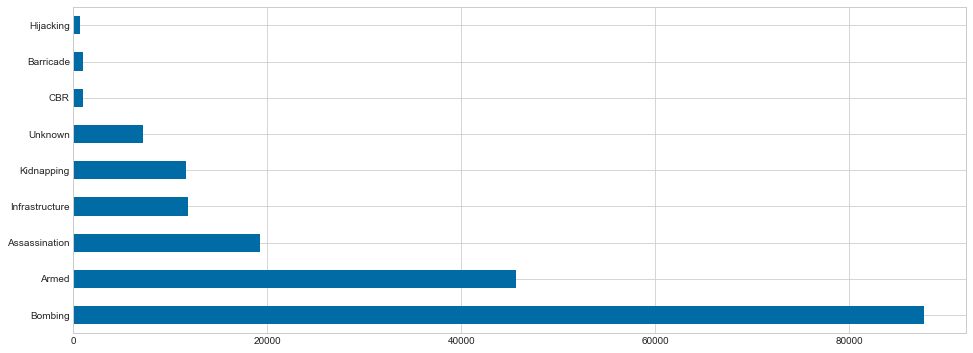

,Bombing,Armed,Assassination,Infrastructure,Kidnapping,Unknown,CBR,Barricade,Hijacking
Total,"87,688.0","45,680.0","19,284.0","11,847.0","11,586.0","7,201.0","1,034.0","1,015.0",669.0
Weight,47.1,24.6,10.4,6.4,6.2,3.9,0.6,0.5,0.4


In [19]:
# Create dict with attack index and type (based on the Codeboock):
dct_attack_type = {1: 'Assassination', 2: 'Armed', 3: 'Bombing',
                   4: 'Hijacking', 5: 'Barricade', 6: 'Kidnapping',
                   7: 'Infrastructure', 8: 'CBR', 9: 'Unknown'}

# Create dataframe to count attacks by type:
df_attack_type = pd.DataFrame(columns=['Total'])

# Check each attack type:
for key, attack in dct_attack_type.items():
    df_attack_type.loc[attack, 'Total'] = np.sum(
        np.where(
            np.logical_or(
                df_from_kaggle['attacktype1'].values == key,
                df_from_kaggle['attacktype2'].values == key,
                df_from_kaggle['attacktype3'].values == key),
            1, 0)
    )

# Calculate weights:
df_attack_type['Weight'] = (df_attack_type.Total / sum(df_attack_type.Total) * 100)

# Print result:
df_attack_type = df_attack_type.sort_values(by='Total', ascending=False)

# Show barplot:
fig, ax = plt.subplots(figsize=(16,6))
df_attack_type.Total.plot.barh()
plt.show()

# Show the dataframe:
df_attack_type.transpose().style.format('{:,.1f}')

##### Exctract information about attacks weapon type and subtype
We will perform the same procedure to extract the information about weapon type used.

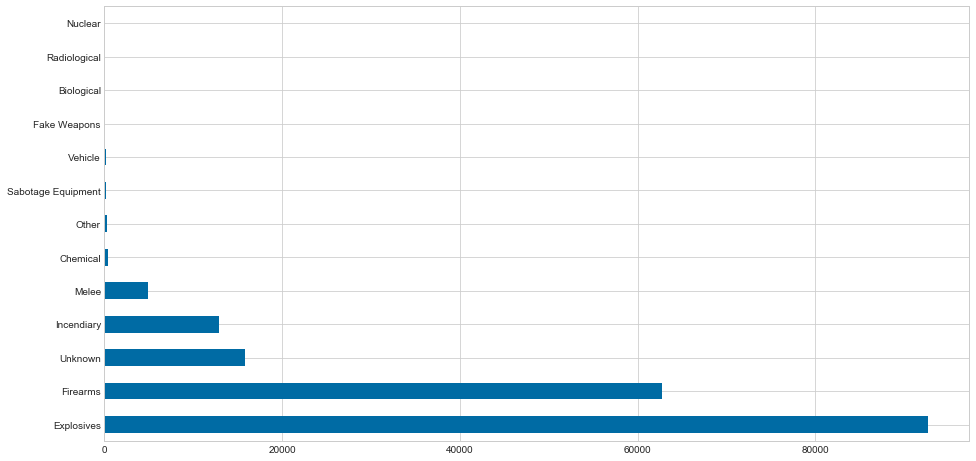

,Explosives,Firearms,Unknown,Incendiary,Melee,Chemical,Other,Sabotage Equipment,Vehicle,Fake Weapons,Biological,Radiological,Nuclear
Total,"92,716.0","62,812.0","15,807.0","12,917.0","4,852.0",374.0,232.0,203.0,187.0,59.0,36.0,14.0,0.0
Weight,48.7,33.0,8.3,6.8,2.6,0.2,0.1,0.1,0.1,0.0,0.0,0.0,0.0


In [20]:
# Create dict with weapon index and type (based on the Codeboock):
dct_weapon_type = {1: 'Biological', 2: 'Chemical', 3: 'Radiological', 4: 'Nuclear',
                   5: 'Firearms', 6: 'Explosives', 7: 'Fake Weapons', 8: 'Incendiary',
                   9: 'Melee', 10: 'Vehicle', 11: 'Sabotage Equipment', 12: 'Other', 13: 'Unknown'}

# Create temp dataframe to count weapon by type:
df_weapon_type = pd.DataFrame(columns=['Total'])

# Check each weapon type:
for key, weapon in dct_weapon_type.items():
    df_weapon_type.loc[weapon] = np.sum(np.where(np.logical_or(df_from_kaggle['weaptype1'].values == key,
                                                               df_from_kaggle['weaptype2'].values == key,
                                                               df_from_kaggle['weaptype3'].values == key),
                                                 1, 0))

# Calculate weights:
df_weapon_type['Weight'] = df_weapon_type.Total / sum(df_weapon_type.Total) * 100

# Sort values:
df_weapon_type = df_weapon_type.sort_values(by='Total', ascending=False)

# Show barplot:
fig, ax = plt.subplots(figsize=(15.5,8))
df_weapon_type.Total.plot.barh()
plt.show()

# Show the dataframe:
df_weapon_type.transpose().style.format('{:,.1f}')

In [21]:
# Create dict with weapon index and subtype (based on the Codeboock):
dct_weapon_sub = {1:  ('Chemical','Poisoning'),
                  2:  ('Firearms','Automatic or Semi-Automatic Rifle'),
                  3:  ('Firearms','Handgun'),
                  4:  ('Firearms','Rifle/Shotgun (non-automatic)'),
                  5:  ('Firearms','Unknown Gun Type'),
                  6:  ('Firearms','Other Gun Type'),
                  7:  ('Explosives','Grenade (not RPGs)'),
                  8:  ('Explosives','Landmine'),
                  9:  ('Explosives','Mail Bomb'),
                  10: ('Explosives','Pressure Trigger'),
                  11: ('Explosives','Projectile'),
                  12: ('Explosives','Remote Device'),
                  13: ('Explosives','Suicide'),
                  14: ('Explosives','Time Fuse'),
                  15: ('Explosives','Vehicle'),
                  16: ('Explosives','Unknown'),
                  17: ('Explosives','Other'),
                  18: ('Incendiary','Arson/Fire'),
                  19: ('Incendiary','Molotov'),
                  20: ('Incendiary','Gasoline or Alcohol'),
                  21: ('Melee','Blunt Object'),
                  22: ('Melee','Hands, Feet, Fists'),
                  23: ('Melee','Knife'),
                  24: ('Melee','Rope'),
                  26: ('Melee','Suffocation'),
                  27: ('Melee','Unknown'),
                  28: ('Explosives','Dynamite/TNT'),
                  29: ('Explosives','Sticky Bomb'),
                  30: ('Chemical','Explosive'),
                  31: ('Explosives','Pipe Bomb')}

# Create temp dataframe to count weapon by type and set index names:
df_weapon_sub = pd.DataFrame(columns=['Total'], index=dct_weapon_sub.values())
df_weapon_sub.index = df_weapon_sub.index.set_names(['Type','Subtype'])

# Check each weapon subtype:
for key, weapon in dct_weapon_sub.items():
    df_weapon_sub.loc[weapon, 'Total'] = np.sum(np.where(np.logical_or(df_from_kaggle['weapsubtype1'].values == key,
                                                                       df_from_kaggle['weapsubtype2'].values == key,
                                                                       df_from_kaggle['weapsubtype3'].values == key),
                                                         1, 0))

# Calculate weights:
df_weapon_sub['Weight'] = df_weapon_sub.Total / sum(df_weapon_sub.Total) * 100

# Print result:
df_weapon_sub = df_weapon_sub.sort_values(by=['Type','Total'], ascending=False)
df_weapon_sub.style.format({'Total':'{0:,d}', 'Weight':'{:.1f}'})

We can conclude, that:
<br>- there is no reason to detail 'Melee', 'Incendiary', 'Firearms' categories;
<br>- 'Explosives': we can unite 'Grenade (not RPGs)', 'Landmine', 'Remote Device', 'Sticky Bomb', 'Time Fuse', 'Dynamite/TNT', and 'Pipe Bomb' under category 'Bombs/Mines'; 'Unknown', 'Other' and 'Mail Bomb' we can include in 'Other Explosives' catecory;
<br>- We can unite 'Unknown', 'Chemical', 'Other', 'Vehicle', 'Sabotage Equipment', 'Fake Weapons', 'Biological', 'Radiological', 'Nuclear' under category 'Other'

##### Transform original dataset into a clear form
Instead of removing unnesseccary columns from original dataframe, it would be easier to create a new one and to copy relative columns.

In [22]:
# Create new dataframe with the index from the Global Terrorism database: 
df_gtd = pd.DataFrame(index=df_from_kaggle.index)

# Copy records into the new dataframe:
df_gtd['ID']          = df_from_kaggle['ID']

# Get date information from orignal dataframe:
df_gtd['Date']        = pd.to_datetime({'Year': df_from_kaggle.Year,
                                        'Month': np.where(df_from_kaggle.Month == 0, 1, df_from_kaggle.Month),
                                        'Day': np.where(df_from_kaggle.Day == 0, 1, df_from_kaggle.Day)})
df_gtd['Year']        = df_from_kaggle['Year']

# Get location info:
df_gtd['Region']      = df_from_kaggle['Region']
df_gtd['Country']     = df_from_kaggle['Country']
df_gtd['City']        = df_from_kaggle['City']
df_gtd['Lat']    = df_from_kaggle['Lat']
df_gtd['Long']   = df_from_kaggle['Long']

# Dataset 'nkill' and 'nwound' records also include perpetraitors loses, we need to substract it,
# taking into account records were there was no victims among civilians but was among perpetraitors
df_gtd['Killed']      = np.where(df_from_kaggle['Killed']  - df_from_kaggle['nkillter'] < 0, 0,
                                 df_from_kaggle['Killed']  - df_from_kaggle['nkillter'])
df_gtd['Injured']     = np.where(df_from_kaggle['Injured'] - df_from_kaggle['nwoundte'] < 0, 0,
                                 df_from_kaggle['Injured'] - df_from_kaggle['nwoundte'])
df_gtd['Victims']     = df_gtd['Killed'] + df_gtd['Injured'] # We will need this aggregation for different filters

# Save additional info:
df_gtd['Perpetrator'] = df_from_kaggle['Perpetrator']
df_gtd['Info']        = df_from_kaggle['Info']

# Create dict to map attacks according to their original categories and subcategories:
dct_categories = {'Bomb_Mines':       {'Category': (),                      'Subcategory': (7,8,10,12,14,28,29,30,31)},
                  'Firearms':         {'Category': (5,),                    'Subcategory': (2,3,4,5,6)},
                  'Melee':            {'Category': (9,),                    'Subcategory': (21,22,23,24,26,27)},
                  'Incendiary':       {'Category': (8,),                    'Subcategory': (18,19,20)},
                  'Suicide':          {'Category': (),                      'Subcategory': (13,)},
                  'Projectile':       {'Category': (),                      'Subcategory': (11,)},
                  'Bombcar':          {'Category': (),                      'Subcategory': (15,)},
                  'Other_Explosives': {'Category': (),                      'Subcategory': (9,16,17)},
                  'Other':            {'Category': (1,2,3,4,7,10,11,12,13), 'Subcategory': (1,)}}

# Extract information about attack type and store it into new dummy colums:
for w, c in dct_categories.items():
    df_gtd[w] = np.where(np.logical_or(np.logical_or(df_from_kaggle['weaptype1'].isin(c['Category']).values,
                                                     df_from_kaggle['weaptype2'].isin(c['Category']).values,
                                                     df_from_kaggle['weaptype3'].isin(c['Category']).values),
                                       np.logical_or(df_from_kaggle['weapsubtype1'].isin(c['Subcategory']).values,
                                                     df_from_kaggle['weapsubtype2'].isin(c['Subcategory']).values,
                                                     df_from_kaggle['weapsubtype3'].isin(c['Subcategory']).values)
                                      ),
                         1, 0)

# Create adtitonal column that describes weapon used (for plotting and filter purposes).
# If more than one type was used, label it as 'Combined':
df_gtd['Weapon_Used'] = df_gtd.iloc[:,13:].dot(df_gtd.columns[13:] + ', ').str.rstrip(', ')
df_gtd['Weapon_Used'] = df_gtd['Weapon_Used'].apply(lambda row: np.where( len(row.split(', ')) > 1, 'Combined', row))

# Reorder columns:
df_gtd = df_gtd[['ID', 'Date', 'Year', 'Region', 'Country', 'City', 'Lat', 'Long',
           'Killed', 'Injured', 'Victims', 'Perpetrator', 'Info', 
           'Weapon_Used', 'Bomb_Mines', 'Firearms', 'Melee', 'Incendiary', 'Suicide',
           'Projectile', 'Bombcar', 'Other_Explosives', 'Other']]

# Print first few records from the dataframe:
df_gtd.head()

,ID,Date,Year,Region,Country,City,Lat,Long,Killed,Injured,...,Weapon_Used,Bomb_Mines,Firearms,Melee,Incendiary,Suicide,Projectile,Bombcar,Other_Explosives,Other
0,1.970000e+11,1970-07-02,1970,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,NaN,...,Other,0,0,0,0,0,0,0,0,1
1,1.970000e+11,1970-01-01,1970,North America,Mexico,Mexico city,19.371887,-99.086624,NaN,NaN,...,Other,0,0,0,0,0,0,0,0,1
2,1.970010e+11,1970-01-01,1970,Southeast Asia,Philippines,Unknown,15.478598,120.599741,NaN,NaN,...,Other,0,0,0,0,0,0,0,0,1
3,1.970010e+11,1970-01-01,1970,Western Europe,Greece,Athens,37.997490,23.762728,NaN,NaN,...,Other_Explosives,0,0,0,0,0,0,0,1,0
4,1.970010e+11,1970-01-01,1970,East Asia,Japan,Fukouka,33.580412,130.396361,NaN,NaN,...,Incendiary,0,0,0,1,0,0,0,0,0


#####  Check records for 'Israel' and 'West Bank and Gaza Strip'
To properly aggregate data about Israel, we need to check what attacks are recorded under "West Bank and Gaza Strip"

In [23]:
# Create index for records of attacks marked 'West Bank and Gaza':
ind_wbg = df_gtd.Country.values == 'West Bank and Gaza Strip'

print('Number of records marked as attacks in West Bank and Gaza: {:,}'.format(sum(ind_wbg)))

Number of records marked as attacks in West Bank and Gaza: 2,218


Although these records are marked as attacks in West Bank and Gaza, there are many records were israel citizens were attacked by palestinians, so actualy they should be recorded as attacks that took place in Israel. To do so, we first need to extract such records, and then to change their Country to "Israel". 

To select records were israelians were attacked, we will extract records where 'Info' column contains such words as "israel", "jew", "settle", "jerusalem", "border", "idf"

In [24]:
# Set the keywords:
lst_keywords = ['israel','jew','settle','jerusalem','border','idf']

# Create subindex of records that contains the keywords:
ind_wbg_isr = df_gtd.loc[ind_wbg].Info.str.lower().str.contains('|'.join(lst_keywords), na=False)

print('Number of records with the key words:', sum(ind_wbg_isr))

Number of records with the key words: 977


Compare statistics of both subsets (with and without keywords).

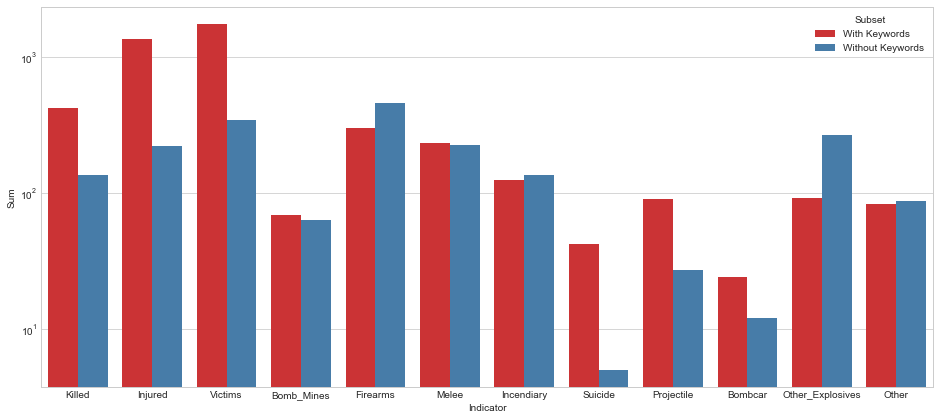

,Killed,Injured,Victims,Bomb_Mines,Firearms,Melee,Incendiary,Suicide,Projectile,Bombcar,Other_Explosives,Other
With Keywords,423.0,1362.0,1757.0,69.0,300.0,233.0,125.0,42.0,91.0,24.0,92.0,84.0
Without Keywords,136.0,224.0,346.0,63.0,463.0,225.0,137.0,5.0,27.0,12.0,268.0,87.0


In [25]:
# Create new dataframe to compare statistics of records with and without keywords:
df_wbg_isr = pd.concat(
    [df_gtd.iloc[ind_wbg, [*range(8,11),*range(14,23)]].loc[ ind_wbg_isr].sum().rename('With Keywords'),
     df_gtd.iloc[ind_wbg, [*range(8,11),*range(14,23)]].loc[~ind_wbg_isr].sum().rename('Without Keywords')],
          axis=1)

# Create figure:
fig, ax = plt.subplots(figsize=(16,7))

# Set style:
plt.style.use(['seaborn-whitegrid', 'tableau-colorblind10'])

# Add barplot to the figure:
_ = sns.barplot(data=pd.melt(frame= df_wbg_isr.reset_index().rename(columns={'index': 'Indicator'}),
                             id_vars='Indicator',
                             var_name='Subset',
                             value_name='Sum'),
                x='Indicator',
                y='Sum',
                hue='Subset',
                palette='Set1',
                ax=ax)

# Set logarifmic scale for y-axis: 
ax.set_yscale('log')

# Show the plot:
plt.show()

# Show the dataframe in more convinient way:
df_wbg_isr.transpose()

Inspite the fact that there is less than 45% of records that contain selected keywords, there is about six times more victims in this subset. Also almost all suicide attacks and most of projectiles belong to it.
<br>It seem logical: Israel past through two intifadas with many bloody suicide attacks that took many lifes, while palestinians didn't experience such an horror.
<br>Before we continue, lets check those few suicide and projectile attacks that do not contain the keywords.

In [26]:
for ind, _ in df_gtd.loc[ind_wbg & ((df_gtd.Suicide.values == 1) |
                                    (df_gtd.Projectile.values == 1))].loc[~ind_wbg_isr].iterrows():
    print('Record:\t\t{0}\nDate:\t\t{1}\nKilled:\t\t{2}\nInjured:\t{3}\nWeapon used:\t{4}\nInfo:\n{5}\n{6}'\
          .format(df_gtd.loc[ind, 'ID'],
                  df_gtd.loc[ind, 'Date'],
                  df_gtd.loc[ind, 'Killed'],
                  df_gtd.loc[ind, 'Injured'],
                  df_gtd.loc[ind, 'Weapon_Used'],
                  df_gtd.loc[ind, 'Info'],
                  '-'*125))

Record:		198410280016.0
Date:		1984-10-28 00:00:00
Killed:		nan
Injured:	nan
Weapon used:	Projectile
Info:
nan
-----------------------------------------------------------------------------------------------------------------------------
Record:		199411110003.0
Date:		1994-11-11 00:00:00
Killed:		nan
Injured:	nan
Weapon used:	Suicide
Info:
nan
-----------------------------------------------------------------------------------------------------------------------------
Record:		199412220008.0
Date:		1994-12-22 00:00:00
Killed:		nan
Injured:	nan
Weapon used:	Suicide
Info:
nan
-----------------------------------------------------------------------------------------------------------------------------
Record:		199501150001.0
Date:		1995-01-15 00:00:00
Killed:		nan
Injured:	nan
Weapon used:	Projectile
Info:
nan
-----------------------------------------------------------------------------------------------------------------------------
Record:		199704010002.0
Date:		1997-04-01 00:00:00
Killed:

Most of selected attacks took place in 2007 - so called "Battle of Gaza": https://en.wikipedia.org/wiki/Battle_of_Gaza_(2007)
<br>Now we can reassign lables for attacks containing keywords.

In [27]:
# Change "Country" label to "Israel":
df_gtd.loc[df_gtd.loc[ind_wbg].loc[ind_wbg_isr].index, 'Country'] = 'Israel'

# Check number of records with "Country" label = 'West Bank and Gaza'
print('Number of records marked as attacks in West Bank and Gaza: {:,}'\
      .format(len(df_gtd.loc[df_gtd.Country.values == 'West Bank and Gaza Strip'])))

Number of records marked as attacks in West Bank and Gaza: 1,241


# <center>Global Population Dataset</center>
### <center>Data import and cleaning</center>
There are several ways to compare how countries suffer from the terrorist attacks: by the number of attacks, by the number of victims, or by the number of victims per capita (meaning, the chance to die in the terror attack).
<br>For the last option we need to get data about global population from WorldBank: <br>https://data.worldbank.org/indicator/sp.pop.totl

In [28]:
df_pop = pd.read_csv('data\wb_population_by_country.csv', header=2, encoding="ISO-8859-1", low_memory=False)
print('Total number of records:', len(df_pop))

# Print first 3 records from the dataframe:
df_pop.head(3)

Total number of records: 264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN,NaN


Before we start our manipulation with this dataset, it would be wise to change some column names:

In [29]:
df_pop = df_pop.rename(columns={'Country Name':'Country', 'Country Code':'Code'})

##### Country names matching
We have to check that countries in these two dataframes are called the same way, otherwise we wouldn't be able to merge it properly

In [30]:
# Define function to get unique names from datasets:
def get_unique_names(df1, df2, column):
    df1_ex  = set(df1[column]).difference(set(df2[column]))
    df2_ex  = set(df2[column]).difference(set(df1[column]))
    df1_df2 = set(df1[column]).intersection(set(df2[column]))
    
    # Print results:
    print('Number of countries with same names:', len(df1_df2))
    print('Number of unique names in first  dataset:', len(df1_ex))
    print('Number of unique names in second dataset:', len(df2_ex))
    
    return df1_ex, df2_ex

In [31]:
# Get unique counries names from both datasets:
gtd_ex,pop_ex = get_unique_names(df_gtd, df_pop, 'Country')

Number of countries with same names: 159
Number of unique names in first  dataset: 45
Number of unique names in second dataset: 105


We don't care about unique names in the population dataset unless we have all the names in the attacks dataset matched. 
Lets take a closer look on these names:

In [32]:
print('Unique country names in terrorist attack dataframe:')
print_huge_list(sorted(gtd_ex), cols=5)

print('\nUnique country names in population dataframe:')
print_huge_list(sorted(pop_ex), cols=2)

Unique country names in terrorist attack dataframe:
+-----------------------+--------------------+--------------+-------------------+----------------------------------+
| Bahamas               | Bosnia-Herzegovina | Brunei       | Czechoslovakia    | Democratic Republic of the Congo |
| East Germany (GDR)    | East Timor         | Egypt        | Falkland Islands  | French Guiana                    |
| Gambia                | Guadeloupe         | Hong Kong    | International     | Iran                             |
| Ivory Coast           | Kyrgyzstan         | Laos         | Macau             | Macedonia                        |
| Martinique            | New Hebrides       | North Korea  | North Yemen       | People's Republic of the Congo   |
| Republic of the Congo | Rhodesia           | Russia       | Serbia-Montenegro | South Korea                      |
| South Vietnam         | South Yemen        | Soviet Union | Swaziland         | Syria                            |
| Taiwan    

To find matches between *df_pop* and *df_gtd* country names we will try two approaches:
<br>- **geonamescache** library: we will try to find iso3 country codes for uniqie country names in *df_gtd* and match it with the codes in *df_pop* dataset;
<br>- **fuzzywuzzy** string matching library to find most probable matches between country names in both datasets.
<br>
<br>Geonamescache library:

In [33]:
# Import library:
from geonamescache.mappers import country

# Initiate mapper to find iso codes by country name:
mapper = country(from_key='name', to_key='iso3')

# Create lists to store founded matches:
lst_gtd_names = []
lst_pop_names = []

# Iterate over set of unique country names in df_gtd:
for cntry in gtd_ex:
    iso3 = mapper(cntry)
    if iso3 != None and iso3 in set(df_pop.Code):
        lst_gtd_names.append(cntry)
        lst_pop_names.append(*df_pop.loc[df_pop.Code.values == iso3, 'Country'].tolist())

# Show results:
print('{} matches found:'.format(len(lst_gtd_names)))
print_huge_list([*zip(lst_gtd_names, lst_pop_names)],cols=2)

20 matches found:
+------------------------------------------------------+----------------------------------------------------------+
| ('South Korea', 'Korea, Rep.')                       | ('Bosnia-Herzegovina', 'Bosnia and Herzegovina')         |
| ('Laos', 'Lao PDR')                                  | ('Kyrgyzstan', 'Kyrgyz Republic')                        |
| ('North Korea', 'Korea, Dem. Peopleâ\x80\x99s Rep.') | ('Egypt', 'Egypt, Arab Rep.')                            |
| ('West Bank and Gaza Strip', 'West Bank and Gaza')   | ('Iran', 'Iran, Islamic Rep.')                           |
| ('Venezuela', 'Venezuela, RB')                       | ('Macau', 'Macao SAR, China')                            |
| ('Hong Kong', 'Hong Kong SAR, China')                | ('Brunei', 'Brunei Darussalam')                          |
| ('Syria', 'Syrian Arab Republic')                    | ('Ivory Coast', "Cote d'Ivoire")                         |
| ('Russia', 'Russian Federation')                    

In [34]:
# Replace original names from df_gtd with its equivalent from df_pop:
df_gtd = df_gtd.replace(lst_gtd_names, lst_pop_names)

# Get unique counries names from both datasets:
gtd_ex,pop_ex = get_unique_names(df_gtd, df_pop, 'Country')

print('Unique country names in terrorist attack dataframe after name replacement:')
print_huge_list(sorted(gtd_ex), cols=5)

Number of countries with same names: 179
Number of unique names in first  dataset: 25
Number of unique names in second dataset: 85
Unique country names in terrorist attack dataframe after name replacement:
+-------------------+--------------------------------+----------------+-------------------+---------------+
| Czechoslovakia    | East Germany (GDR)             | East Timor     | Falkland Islands  | French Guiana |
| Guadeloupe        | International                  | Macedonia      | Martinique        | New Hebrides  |
| North Yemen       | People's Republic of the Congo | Rhodesia       | Serbia-Montenegro | South Vietnam |
| South Yemen       | Soviet Union                   | Swaziland      | Taiwan            | Vatican City  |
| Wallis and Futuna | West Germany (FRG)             | Western Sahara | Yugoslavia        | Zaire         |
|                   |                                |                |                   |               |
+-------------------+-----------------

FuzzyWuzzy library:

In [35]:
# Import library:
from fuzzywuzzy import fuzz

# Create lists to store founded matches:
lst_gtd_names   = []
lst_suggestions = []

# Iterate over set of unique country names in df_gtd:
for cntry_gtd in gtd_ex:
    best_match = ''
    best_ratio = 0

    for cntry_pop in set(df_pop.Country):
        ratio = fuzz.token_set_ratio(cntry_gtd, cntry_pop)
        if ratio > best_ratio:
            best_ratio = ratio
            best_match = cntry_pop
    
    lst_gtd_names.append(cntry_gtd)
    lst_suggestions.append(best_match)


# Print the result:
pd.DataFrame({'Original name':lst_gtd_names, 'Suggested name': lst_suggestions})

,Original name,Suggested name
0,East Germany (GDR),Germany
1,Rhodesia,Indonesia
2,Martinique,Mauritius
3,Vatican City,Costa Rica
4,Swaziland,Thailand
5,Guadeloupe,Guatemala
6,West Germany (FRG),Germany
7,Soviet Union,European Union
8,International,Argentina
9,East Timor,Timor-Leste


In [36]:
# Select indexes of correctly suggested names:
ind_correct = (1,2,3,6,10,11,15,20)

# Redefine lists with country names and manually add three countries that algorithm wasn't able to find:
lst_gtd_names = [lst_gtd_names[i]   for i in ind_correct]+['Soviet Union',"People's Republic of the Congo",'Zaire']
lst_pop_names = [lst_suggestions[i] for i in ind_correct]+['Russian Federation','Congo, Rep.','Congo, Dem. Rep.']

In [37]:
# Replace original names from df_gtd with its equivalent from df_pop:
df_gtd = df_gtd.replace(lst_gtd_names, lst_pop_names)

# Get unique counries names from both datasets:
gtd_ex,pop_ex = get_unique_names(df_gtd, df_pop, 'Country')

print('Unique country names in terrorist attack dataframe after name replacement:')
print_huge_list(sorted(gtd_ex), cols=5)
print('Total number of records for unique country names:\t{}'.format(sum(np.isin(df_gtd.Country, list(gtd_ex)))))
for cntry in gtd_ex:
    print('{:<18}:\t{}'.format(cntry, sum(df_gtd.Country == cntry)))

Number of countries with same names: 180
Number of unique names in first  dataset: 15
Number of unique names in second dataset: 84
Unique country names in terrorist attack dataframe after name replacement:
+----------------+--------------------+--------------+-------------------+----------------+
| Czechoslovakia | East Germany (GDR) | East Timor   | Falkland Islands  | French Guiana  |
| Guadeloupe     | International      | New Hebrides | Serbia-Montenegro | South Vietnam  |
| South Yemen    | Swaziland          | Taiwan       | Wallis and Futuna | Western Sahara |
|                |                    |              |                   |                |
+----------------+--------------------+--------------+-------------------+----------------+
Total number of records for unique country names:	194
Guadeloupe        :	52
New Hebrides      :	1
Western Sahara    :	5
International     :	1
Taiwan            :	40
South Vietnam     :	1
East Germany (GDR):	37
East Timor        :	10
Czechosl

There is one country name left that has no meaning in our project: 'International', so we chose to drop it

In [38]:
df_gtd = df_gtd.loc[df_gtd.Country != 'International']

##### Matching country codes with corresponding walues in map shapes dataset
Later we would like to plot our data on the world mape, but to do it properly first we need to check that country codes in our dataset are the same as in the map shape dataframe that we've downloaded from *Natural Earth website* (https://www.naturalearthdata.com)
<br>
<br>To save the space, for now we put the code that loads this dataframe and extracts country names and codes into pandas dataframe whithing *if False* statement. If you want to run it, you can change *False* statement to *True*. Otherwise we will load it from the preproccesed pickle file.

In [39]:
import pickle

# If you want to run the code that extract country names and codes from shape dataset,
# change False to True:
if False:
   
    from mpl_toolkits.basemap import Basemap

    # Create basemap object:
    m = Basemap(llcrnrlat=-70,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')

    # Load shape file and name in 'world', so we would be able to call it by 'm.world':
    m.readshapefile('shapes/ne_10m_admin_0_countries', 
                    name='world', 
                    drawbounds=True, 
                    color='darkred',
                    linewidth=0.25)
    # Close the plot, for now we don't need it
    plt.close()
    
    # Create dict to save
    ccode_map = {}
    for record in m.world_info:
        ccode_map[record['ADM0_A3_IS']] = record['NAME_LONG']

    df_ccode_map = pd.DataFrame({'Code'   :[*ccode_map.keys()],
                                 'Country':[*ccode_map.values()]})
    print(df_ccode_map.head(3))
    
    with open('shapes/code_names.pkl','wb') as pickle_file:
        pickle.dump(df_ccode_map, pickle_file)

        
if True:
    with open('shapes/code_names.pkl','rb') as pickle_file:
        df_ccode_map = pickle.load(pickle_file)
        print(df_ccode_map.head(3))

  Code    Country
0  IDN  Indonesia
1  MYS   Malaysia
2  CHL      Chile


In [40]:
# Check what codes are missing in our dataset:
print('Codes from map shapes missing in population dataset:',
      *set(df_pop.loc[np.isin(df_pop.Country, df_gtd.Country),'Code'].unique()).difference(set(df_ccode_map.Code)))

Codes from map shapes missing in population dataset: XKX


There is only one code missing, lets try to find its value in population dataset and corresponding country name in map shapes dataframe

In [41]:
# Print name of the country with code "XKX":
print('Country name for missing code in attack dataset is ' + \
      df_pop.loc[df_pop['Code'].values == 'XKX', 'Country'].iloc[0])

Country name for missing code in attack dataset is Kosovo


In [42]:
# Find country code for 'Kosovo' in the second dataframe:
print('Country code for "Kosovo" in map shapes dataset is ' + \
      df_ccode_map.loc[df_ccode_map.Country.str.lower().str.contains('kosovo'), 'Code'].iloc[0])

Country code for "Kosovo" in map shapes dataset is KOS


Now we can replace country code for Kosovo in population dataframe with its map shape value

In [43]:
df_pop.loc[df_pop['Country'].values == 'Kosovo', 'Code'] = 'KOS'

# <center>Merging dataframes</center>

We have successfuly unified countries names in both datasets, but there is one additional step we need to make before we merge them. As we saw previously, population dataset store information in crosstable, where each row goes for a country, and each column - for a specific year. We need to reshape it into a tidy form, where each row is an individual observation, and each column represent separate viriable.

In [44]:
# Melt population dataframe (with columns starting from 1970, because it is the earliest period in the attack dataframe):
df_pop_melted = pd.melt(frame   = df_pop[['Country', 'Code', *map(str, range(1970,2018))]],
                     id_vars    = ['Country', 'Code'],
                     var_name   = 'Year',
                     value_name = 'Population')
df_pop_melted.columns = ['Country', 'Code', 'Year', 'Population']

# Convert 'Year' column to numeric datatype:
df_pop_melted['Year'] = pd.to_numeric(df_pop_melted['Year'])

# Set index:
df_pop_melted = df_pop_melted.set_index(['Year','Country','Code']).reset_index()

# Show first few rows to check the result:
df_pop_melted.head(3)

,Year,Country,Code,Population
0,1970,Aruba,ABW,59063.0
1,1970,Afghanistan,AFG,11126123.0
2,1970,Angola,AGO,6776381.0


Now we can finally merge two dataframes:

In [45]:
# Apply left join on the datasets:
df_gtd_pop = pd.merge(left      = df_gtd,
                      right     = df_pop_melted,
                      how       = 'left',
                      on        = ['Year', 'Country'],
                      sort      = False,
                      indicator = False)

# Show firts few records to check results:
df_gtd_pop.head().transpose()

,0,1,2,3,4
ID,1.97e+11,1.97e+11,1.97001e+11,1.97001e+11,1.97001e+11
Date,1970-07-02 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00
Year,1970,1970,1970,1970,1970
Region,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia
Country,Dominican Republic,Mexico,Philippines,Greece,Japan
City,Santo Domingo,Mexico city,Unknown,Athens,Fukouka
Lat,18.4568,19.3719,15.4786,37.9975,33.5804
Long,-69.9512,-99.0866,120.6,23.7627,130.396
Killed,NaN,NaN,NaN,NaN,NaN
Injured,NaN,NaN,NaN,NaN,NaN


#####  Calculating per capita values

In [46]:
df_gtd_pop['V_1M'] = (df_gtd_pop.Victims/df_gtd_pop.Population * 1e6).fillna(0)
df_gtd_pop.head()

,ID,Date,Year,Region,Country,City,Lat,Long,Killed,Injured,...,Melee,Incendiary,Suicide,Projectile,Bombcar,Other_Explosives,Other,Code,Population,V_1M
0,1.970000e+11,1970-07-02,1970,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,NaN,...,0,0,0,0,0,0,1,DOM,4503114.0,0.0
1,1.970000e+11,1970-01-01,1970,North America,Mexico,Mexico city,19.371887,-99.086624,NaN,NaN,...,0,0,0,0,0,0,1,MEX,52029861.0,0.0
2,1.970010e+11,1970-01-01,1970,Southeast Asia,Philippines,Unknown,15.478598,120.599741,NaN,NaN,...,0,0,0,0,0,0,1,PHL,35804729.0,0.0
3,1.970010e+11,1970-01-01,1970,Western Europe,Greece,Athens,37.997490,23.762728,NaN,NaN,...,0,0,0,0,0,1,0,GRC,8792806.0,0.0
4,1.970010e+11,1970-01-01,1970,East Asia,Japan,Fukouka,33.580412,130.396361,NaN,NaN,...,0,1,0,0,0,0,0,JPN,104345000.0,0.0


# <center>Dataframe for mapping</center>

To visualise terror attacks on the worldmap, we need to create additional dataframe with daily statistics for each country

In [49]:
# Import library:
import itertools


# Create dataframe with all days from 1970 to 2017 for each country:
df_D_stat = pd.DataFrame(itertools.product(df_gtd_pop.Country.unique(),
                                           pd.date_range(start=df_gtd_pop.Date.min(),
                                                         end=df_gtd_pop.Date.max(),
                                                         freq='1D')
                                           ),
                         columns=['Country','Date'])

# Merge this dataframe with attack dataset aggregated on the day level:
df_D_stat = pd.merge(left=df_D_stat,
                     right=pd.concat([df_gtd_pop[['Code','Country','Date','Killed',              # Append column with number
                                                  'Injured','Victims','V_1M']],                  # of Attack with casualties
                                      (df_gtd_pop.Victims > 0).astype(int).rename('FAttacks')],  # and aggregate by bay
                                     axis=1).groupby(['Code','Country','Date']).sum().reset_index(),
                     on=['Country','Date'],
                     how='left',
                     sort=False)

# Fill NaN values with zero:
df_D_stat = df_D_stat.fillna(0)


# Create dict with county names and codes to fill the codes missing (= 0) after reshaping:
ccodes = {}

# Extract country names and codes from the attack dataset:
for _, rec in df_gtd_pop[['Country','Code']].drop_duplicates().iterrows():
    ccodes[rec['Country']] = rec['Code']

# Replace 0 values by the corresponding country codes:
df_D_stat['Code'] = df_D_stat['Country'].apply(lambda rec: ccodes[rec])

# Print few records to check result:
df_D_stat.tail()

,Country,Date,Code,Killed,Injured,Victims,V_1M,FAttacks
3401203,South Sudan,2017-12-27,SSD,0.0,0.0,0.0,0.0,0.0
3401204,South Sudan,2017-12-28,SSD,0.0,0.0,0.0,0.0,0.0
3401205,South Sudan,2017-12-29,SSD,0.0,0.0,0.0,0.0,0.0
3401206,South Sudan,2017-12-30,SSD,0.0,0.0,0.0,0.0,0.0
3401207,South Sudan,2017-12-31,SSD,0.0,0.0,0.0,0.0,0.0


Calculate running windows for two indicators:
<br>- **V_Ov30D** - number of victims over past 30 days (with smoothing)
<br>- **V_1M_OvY** - number of casualties per 1 million population over the past 365 days
<br>
<br>It is logical to assume that more recent attacks have stronger effect than attacks that have happened in the past, so we will use slightly modified sin function to calculate weithgts for each attack in 30-days window. Below you can see the graph that represents these weithgs.

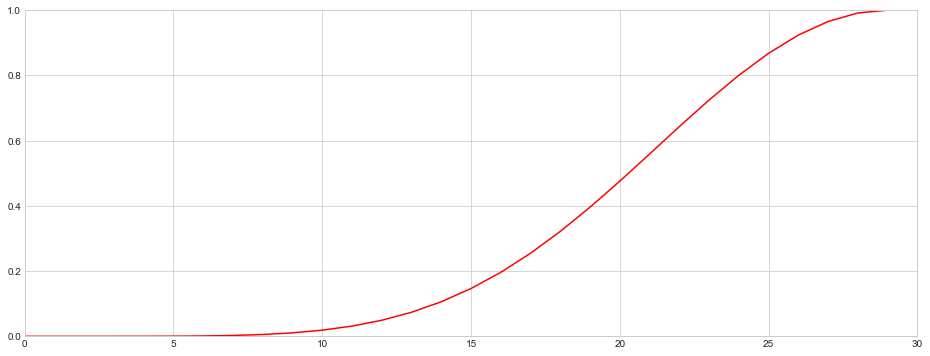

In [58]:
import math

# Define function to calculate smoothed sum:
weights  = np.array([(math.sin(i * math.pi) + 1) / 2 for i in np.linspace(start=-0.5, stop=0.5, num=30)])**3
weights /= np.sum(weights)
weights /= weights.max()

# Plot modified sin function to show weights distribution:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(weights, c='red', label='2')
ax.set_xlim(0,30)
ax.set_ylim(0,1)
plt.show()

In [60]:
# Iterate over each country in the dataframe:
for country in df_D_stat.Country.unique():
    # Create mask to select records for specific country:
    mask = df_D_stat.Country.values == country
    
    # Apply the function on rolling window for each indicator:
    df_D_stat.loc[mask, 'V_Ov30D'] = (df_D_stat.loc[mask, 'FAttacks'] != 0).astype('int').\
    rolling(window=30, min_periods=30).agg(lambda wnd: np.sum(wnd.values*weights))
    
    df_D_stat.loc[mask, 'V_1M_OvY'] = df_D_stat.loc[mask, 'V_1M'].\
    rolling(window=365, min_periods=365).sum()

In [73]:
import pickle

# Save two datasets for futher exploration:
with open('data\df_gtd_pop.pkl','wb') as file:
    pickle.dump(df_gtd_pop, file)
    
with open('data\df_D_stat.pkl','wb') as file:
    pickle.dump(df_D_stat, file)